In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [4]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [ ]:
def naive(p, q):
    ''' fill your code in here...
    '''

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [ ]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

In [13]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [32]:
def with_indices(p, q):
    row, col = np.indices((p.shape[0], q.shape[0]))
    p_ext = p[row.reshape(-1)]
    q_ext = q[col.reshape(-1)]
    distances = np.sum((p_ext - q_ext)**2, axis=1)
    return distances.reshape(p.shape[0], q.shape[0])
    

In [31]:
a = np.arange(4).reshape(2,2)
b = np.arange(4,8).reshape(2,2)
with_indices(a, b)

q
 [[4 5]
 [6 7]
 [4 5]
 [6 7]]


array([[32, 72],
       [ 8, 32]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [34]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [35]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

In [50]:
a = np.arange(4).reshape(2,2)
print('a\n', a)
print('b\n', b)
b = np.arange(4,8).reshape(2,2)
print('a*\n', a[:, np.newaxis, :])
print('b*\n', b[np.newaxis,:,:])
a[:, np.newaxis, :] - b[np.newaxis,:,:]

a
 [[0 1]
 [2 3]]
b
 [[4 5]
 [6 7]]
a*
 [[[0 1]]

 [[2 3]]]
b*
 [[[4 5]
  [6 7]]]


array([[[-4, -4],
        [-6, -6]],

       [[-2, -2],
        [-4, -4]]])

# Compare methods

In [36]:
methods = [with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

6.31 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
500 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.19 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


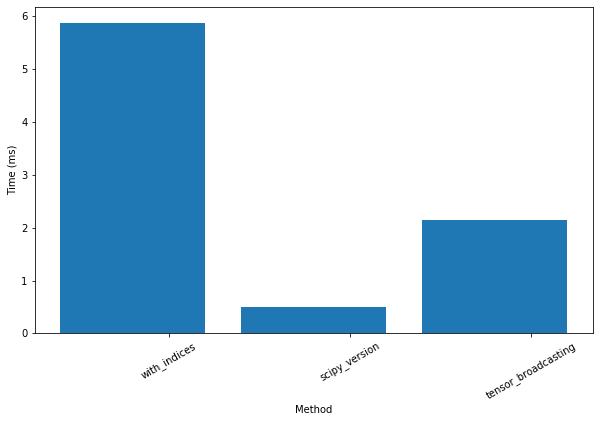

In [37]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()